In [4]:
import os, sys
import healpy as hp
import numpy as np

sys.path.append('../../')
sys.path.append('/DMASS-analysis/measurements/code_py3/')

import esutil
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from utils import *

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

os.chdir('/users/PCON0003/warner785/DMASS-analysis/measurements/code_py3/')
print(os.getcwd())

from calling_catalogs import *
from sys_functions import *

rootdir = '/users/PCON0003/warner785/DMASS-analysis/measurements/clustering/'

from ggl_mcal import run_ng_jk, run_nn_jk, run_nk_jk, compute_eix_jk, compute_Rgamma_jk, construct_jk, compute_jkcov, save_results

sysMap = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/PCA/stars/stars_extmashsof0_16_20_zeros_footprint_nside_4096_nest.fits.gz')
f = fitsio.FITS('/fs/scratch/PCON0008/warner785/bwarner/PCA/stars/stars_extmashsof0_16_20_zeros_footprint_nside_4096_nest.fits.gz')
h = f[-1].read_header()
print(h)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/users/PCON0003/warner785/DMASS-analysis/measurements/code_py3

XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                    8 / width of table in bytes
NAXIS2  =            201326592 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    1 / number of fields in each row
TTYPE1  = 'I'                  / label for field   1
TFORM1  = 'D'                  / data format of field: 8-byte DOUBLE


(201326592,)
(201326592,)
None
8210508


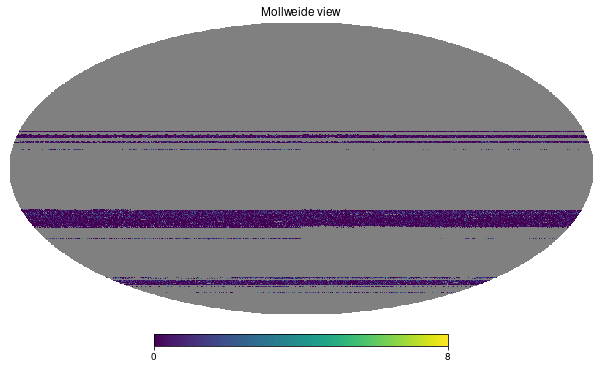

In [10]:
print(sysMap.shape)
flat = sysMap['I'].flatten()
print(sysMap.shape)
print(hp.visufunc.mollview(flat))

unseen = flat[flat != hp.UNSEEN]
print(unseen[unseen != 0].size)

In [ ]:
import os, sys
import esutil
import healpy as hp
import numpy as np
import fitsio
sys.path.append('../')
from xd import *
from run_DMASS_Y3 import *
from utils import *
import healpy as hp
from systematics import *
from cmass_modules import io
os.chdir('../../DMASS_XDGMM/code_py3/')
print(os.getcwd())
from xdgmm import XDGMM as XDGMM_Holoien
os.chdir('../../DMASSY3/code_py3/')
print(os.getcwd())

gold_spt = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/'+'cardinal.fits')

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


/users/PCON0003/warner785/DMASS_XDGMM/code_py3


In [3]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0008/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [4]:
mask_magcut = priorCut_test(gold_spt)
gold_spt = gold_spt[mask_magcut]
print(gold_spt.size)    
gold_spt = keepGoodRegion(gold_spt)
print(gold_spt.size)

43785812
38284875


In [5]:
#save fits file:
outdir = '/fs/scratch/PCON0008/warner785/bwarner/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write(outdir+'cardinal_masked.fits', gold_spt, overwrite=True)

In [4]:
#fig, ax = plt.subplots()
print(np.min(gold_spt['RA']))
print(np.min(gold_spt['DEC']))

2.340824920565865e-07
-67.44583892822266


In [7]:
print(gold_spt['RA'].size)

1399546088


In [1]:
import os, sys
import esutil
import healpy as hp
import numpy as np
import fitsio
sys.path.append('../')
from xd import *
from run_DMASS_Y3 import *
from utils import *
import healpy as hp
from systematics import *
from cmass_modules import io
os.chdir('../../DMASS_XDGMM/code_py3/')
print(os.getcwd())
from xdgmm import XDGMM as XDGMM_Holoien
os.chdir('../../DMASSY3/code_py3/')
print(os.getcwd())

input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
input_keyword = 'dmass_cardinal_'

dmass_card = io.SearchAndCallFits(path = input_path, keyword = input_keyword)

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


/users/PCON0003/warner785/DMASS_XDGMM/code_py3
/users/PCON0003/warner785/DMASSY3/code_py3

Calling catalogs >>>
dmass_cardinal_0.fits
dmass_cardinal_6.fits
dmass_cardinal_4.fits
dmass_cardinal_9.fits
dmass_cardinal_1.fits
dmass_cardinal_2.fits
dmass_cardinal_7.fits
dmass_cardinal_8.fits
dmass_cardinal_3.fits
dmass_cardinal_5.fits
reading 1/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_0.fits
reading 2/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_6.fits
reading 3/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_4.fits
reading 4/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_9.fits
reading 5/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_1.fits
reading 6/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_2.fits
reading 7/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_7.fits
reading 8/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_8.fits
reading 9/10 /fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_3.fits
re

In [2]:
outdir = '/fs/scratch/PCON0008/warner785/bwarner/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write( outdir+'dmass_cardinal_FULL.fits', dmass_card, overwrite=True)